In [34]:
import pandas as  pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning (ITHUB) /ДИ 2023/lessons/data/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
df['sex']=df['sex'].map({'Male':1,'Female':0})
df['DRK_YN']=df['DRK_YN'].map({'Y':1,'N':0})
df['hear_left']=df['hear_left']-1
df['hear_right']=df['hear_right']-1
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,0.0,0.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,0.0,0.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,0.0,0.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,0.0,0.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,0.0,0.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [4]:
#сделать срез
df_new = df[:50000]
df_new['DRK_YN'].value_counts()

0    25126
1    24874
Name: DRK_YN, dtype: int64

In [5]:
X=df_new.drop(['DRK_YN'],axis=1)
Y=df_new['DRK_YN']
X.shape

(50000, 23)

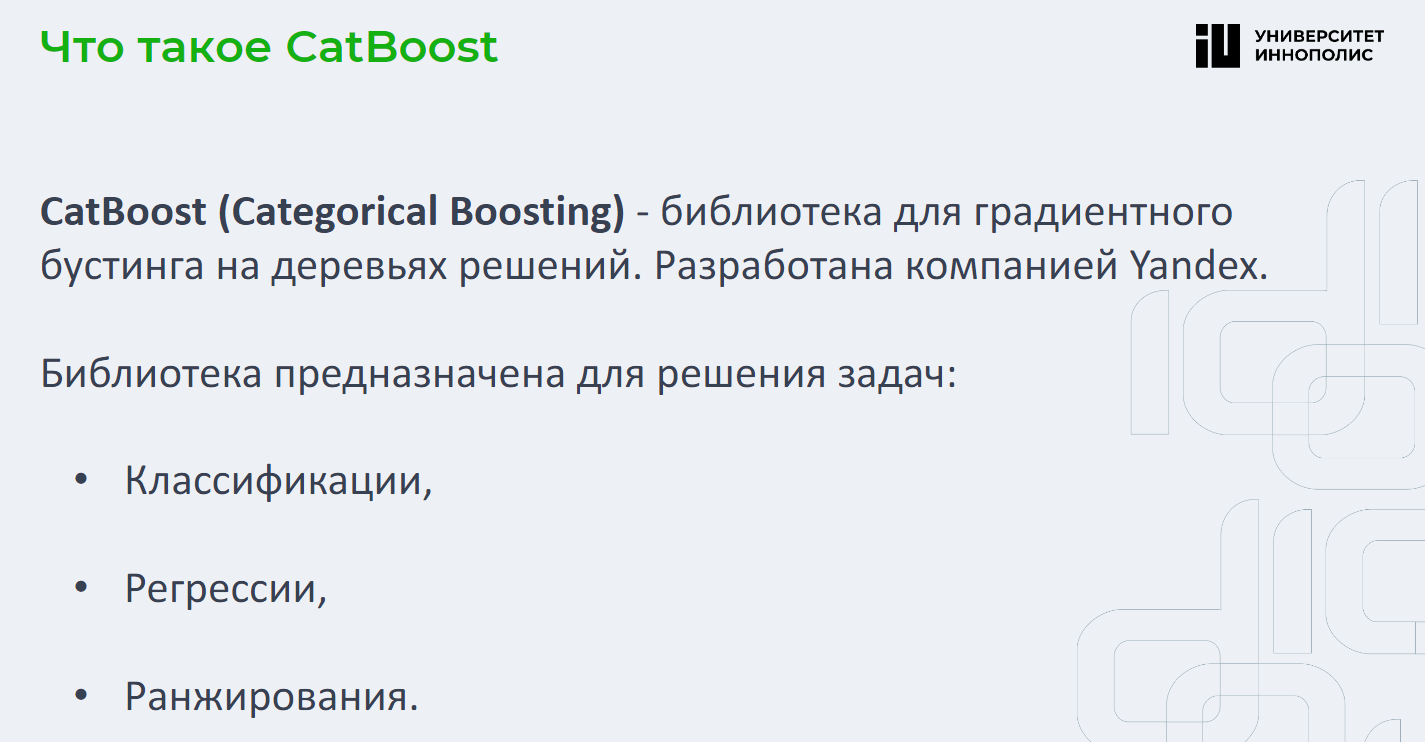

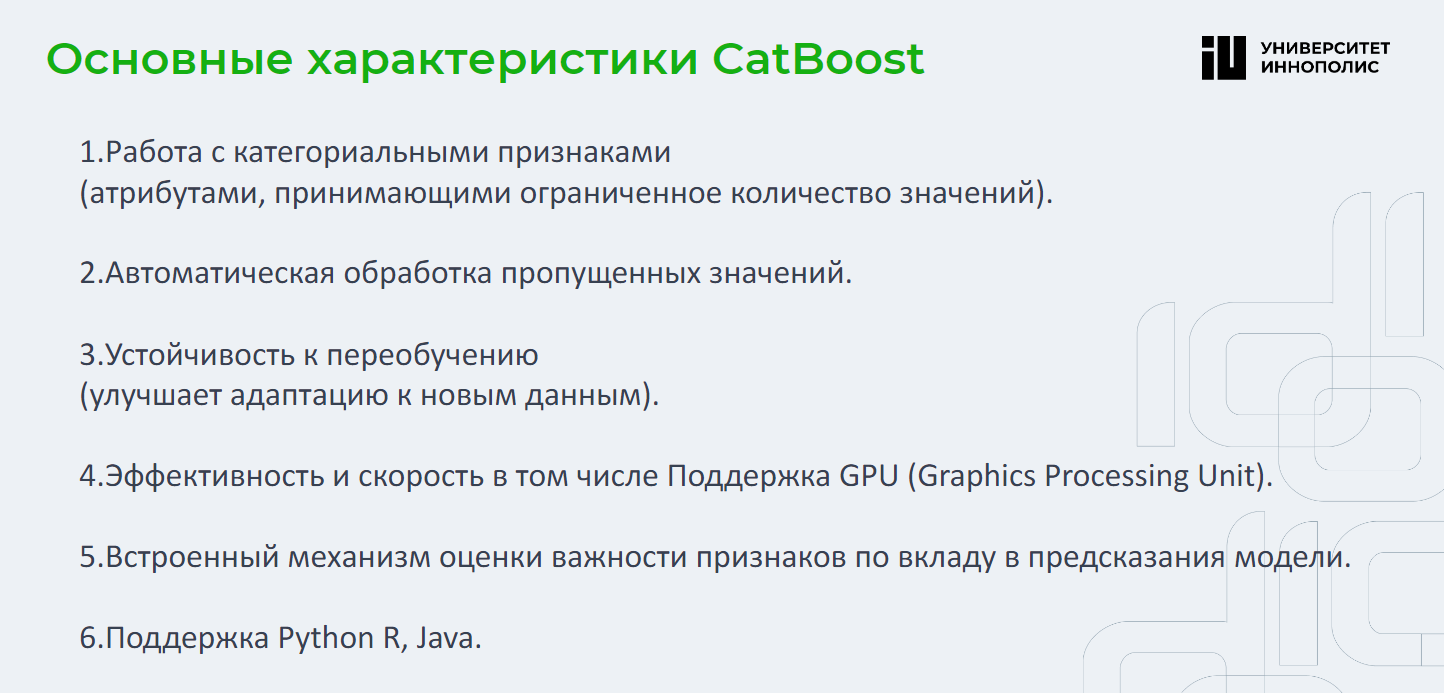

In [6]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


Жутко подробный гайд - https://coderzcolumn.com/tutorials/machine-learning/catboost-an-in-depth-guide-python#3

# Регрессия

In [7]:
from catboost import CatBoostRegressor

In [8]:
X=df_new.drop(['gamma_GTP'],axis=1)
Y=df_new['gamma_GTP']
X.shape

(50000, 23)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=123)

booster = CatBoostRegressor(iterations=100, verbose=10)

booster.fit(X_train, Y_train, eval_set=(X_test, Y_test))
booster.set_feature_names(X.columns)

Learning rate set to 0.377094
0:	learn: 43.9757769	test: 42.0977967	best: 42.0977967 (0)	total: 76.1ms	remaining: 7.53s
10:	learn: 35.3500783	test: 35.7206843	best: 35.7000859 (9)	total: 281ms	remaining: 2.27s
20:	learn: 34.2491070	test: 35.6105789	best: 35.6105789 (20)	total: 413ms	remaining: 1.55s
30:	learn: 33.2447448	test: 35.4767352	best: 35.4626774 (29)	total: 497ms	remaining: 1.1s
40:	learn: 32.5854955	test: 35.7748651	best: 35.4538070 (31)	total: 595ms	remaining: 856ms
50:	learn: 31.9769749	test: 36.0448315	best: 35.4538070 (31)	total: 780ms	remaining: 749ms
60:	learn: 31.1177846	test: 36.1434998	best: 35.4538070 (31)	total: 990ms	remaining: 633ms
70:	learn: 30.5124805	test: 36.0858194	best: 35.4538070 (31)	total: 1.16s	remaining: 472ms
80:	learn: 30.0059407	test: 36.0920255	best: 35.4538070 (31)	total: 1.43s	remaining: 334ms
90:	learn: 29.6099308	test: 36.1393604	best: 35.4538070 (31)	total: 1.67s	remaining: 165ms
99:	learn: 29.2249790	test: 36.0426186	best: 35.4538070 (31)	to

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
y_pred_booster = booster.predict(X_test)

In [12]:
regressor = LinearRegression() # а вот и наша модель
regressor.fit(X_train, Y_train) # А тут обучение на обучающей выборке

LinearRegression()

In [13]:
y_pred=regressor.predict(X_test)
y_pred[:10]

array([14.87542224, 18.83768738, 18.16612061,  2.25695726, 44.73976086,
       28.94298038, 34.37292277, 15.09418396, 27.0982202 , 40.61412347])

In [14]:
true_vs_pred = pd.DataFrame({'Истинные': Y_test, 'Предсказанные_регр': y_pred,'Предсказанные_catboost': y_pred_booster})

In [15]:
import plotly.graph_objects as go

random_x = np.linspace(0, len(true_vs_pred['Истинные']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Истинные'],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_catboost'],
                    mode='lines+markers',
                    name='Биба'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_регр'],
                    mode='lines+markers',
                    name='Боба'))

fig.show()

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,y_pred_booster)
print('Коэффициент детерминации Catboost:',r2)


Коэффициент детерминации Catboost: 0.426892470340822


In [17]:
r2 = r2_score(Y_test,y_pred)
print('Коэффициент детерминации Regr:',r2)

Коэффициент детерминации Regr: 0.29827008335624805


In [18]:
booster = CatBoostRegressor()

params = {
            'iterations':[10,50,100],
            'learning_rate':[0.01, 0.1],
            'bootstrap_type':['Bayesian', 'No']
}

search_results = booster.grid_search(params, X_train, Y_train, cv=5)

print("\nBest Params : ", search_results['params'])

0:	learn: 60.6474748	test: 61.6911792	best: 61.6911792 (0)	total: 6.87ms	remaining: 61.9ms
1:	learn: 60.3314890	test: 61.3595778	best: 61.3595778 (1)	total: 12.4ms	remaining: 49.6ms
2:	learn: 60.0195938	test: 61.0345501	best: 61.0345501 (2)	total: 19.6ms	remaining: 45.7ms
3:	learn: 59.7111172	test: 60.7154580	best: 60.7154580 (3)	total: 25.2ms	remaining: 37.9ms
4:	learn: 59.4075173	test: 60.3913401	best: 60.3913401 (4)	total: 30.9ms	remaining: 30.9ms
5:	learn: 59.1075021	test: 60.0784986	best: 60.0784986 (5)	total: 37.1ms	remaining: 24.7ms
6:	learn: 58.8108285	test: 59.7658443	best: 59.7658443 (6)	total: 44.7ms	remaining: 19.2ms
7:	learn: 58.5128177	test: 59.4601695	best: 59.4601695 (7)	total: 49.9ms	remaining: 12.5ms
8:	learn: 58.2213466	test: 59.1627831	best: 59.1627831 (8)	total: 55.4ms	remaining: 6.15ms
9:	learn: 57.9228739	test: 58.8513180	best: 58.8513180 (9)	total: 60.9ms	remaining: 0us

bestTest = 58.85131798
bestIteration = 9

0:	loss: 58.8513180	best: 58.8513180 (0)	total: 11

In [19]:
booster = CatBoostRegressor(iterations=100, verbose=10,learning_rate=0.1,bootstrap_type='No')
booster.fit(X_train,Y_train)
y_pred_booster_tune = booster.predict(X_test)

0:	learn: 47.4427855	total: 6.62ms	remaining: 656ms
10:	learn: 40.1489453	total: 65.4ms	remaining: 529ms
20:	learn: 37.5728948	total: 122ms	remaining: 458ms
30:	learn: 36.3190692	total: 175ms	remaining: 390ms
40:	learn: 35.4826975	total: 227ms	remaining: 327ms
50:	learn: 34.9286137	total: 293ms	remaining: 282ms
60:	learn: 34.5851207	total: 339ms	remaining: 217ms
70:	learn: 34.3255297	total: 387ms	remaining: 158ms
80:	learn: 34.0275687	total: 441ms	remaining: 103ms
90:	learn: 33.8104695	total: 484ms	remaining: 47.9ms
99:	learn: 33.5978806	total: 524ms	remaining: 0us


In [20]:
r2 = r2_score(Y_test,y_pred_booster_tune)
print('Коэффициент детерминации Regr:',r2)

Коэффициент детерминации Regr: 0.4344738352087827


# Классификация

In [21]:
from catboost import CatBoostClassifier

In [22]:
X=df_new.drop(['DRK_YN'],axis=1)
Y=df_new['DRK_YN']
X.shape

(50000, 23)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=123)

booster = CatBoostClassifier(iterations=100, verbose=10)

booster.fit(X_train, Y_train, eval_set=(X_test, Y_test), plot=True)
booster.set_feature_names(X.columns)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.220929
0:	learn: 0.6380568	test: 0.6364294	best: 0.6364294 (0)	total: 28.5ms	remaining: 2.82s
10:	learn: 0.5375400	test: 0.5301947	best: 0.5301947 (10)	total: 243ms	remaining: 1.96s
20:	learn: 0.5269844	test: 0.5217370	best: 0.5217370 (20)	total: 367ms	remaining: 1.38s
30:	learn: 0.5203837	test: 0.5186537	best: 0.5184693 (29)	total: 464ms	remaining: 1.03s
40:	learn: 0.5158660	test: 0.5168353	best: 0.5168353 (40)	total: 565ms	remaining: 813ms
50:	learn: 0.5115577	test: 0.5152865	best: 0.5152865 (50)	total: 666ms	remaining: 640ms
60:	learn: 0.5066314	test: 0.5136308	best: 0.5136308 (60)	total: 760ms	remaining: 486ms
70:	learn: 0.5027955	test: 0.5131641	best: 0.5131641 (70)	total: 851ms	remaining: 348ms
80:	learn: 0.4983600	test: 0.5133016	best: 0.5131641 (70)	total: 971ms	remaining: 228ms
90:	learn: 0.4952530	test: 0.5131550	best: 0.5131550 (90)	total: 1.07s	remaining: 106ms
99:	learn: 0.4923404	test: 0.5133670	best: 0.5131550 (90)	total: 1.16s	remaining: 0us

best

In [27]:
y_pred_booster = booster.predict(X_test)
print(y_pred_booster[:10])
print(Y_test[:10].values)

[0 0 0 0 0 0 1 0 0 1]
[0 0 0 0 0 1 1 0 0 1]


In [30]:
clf = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

In [31]:
clf.fit(X_train, Y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [32]:
y_clf = clf.predict(X_test)

In [33]:
print(y_clf[:10])
print(Y_test[:10].values)

[0 0 0 0 0 0 1 0 1 1]
[0 0 0 0 0 1 1 0 0 1]


In [35]:
print('Precision - ',precision_score(y_clf,Y_test))
print('Recall - ',recall_score(y_clf,Y_test))

Precision -  0.7016064257028113
Recall -  0.7334172963895886


In [36]:
print('Precision - ',precision_score(y_pred_booster,Y_test))
print('Recall - ',recall_score(y_pred_booster,Y_test))

Precision -  0.7349397590361446
Recall -  0.7355305466237942


In [37]:
booster = CatBoostClassifier(eval_metric = 'Accuracy')

params = {
            'iterations':[10,50,100, 1000],
            'learning_rate':[0.001, 0.01, 0.1],
            'bootstrap_type':['Bayesian', 'No']
}

search_results = booster.grid_search(params, X_train, Y_train, cv=5,)

print("\nBest Params : ", search_results['params'])

Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 0.7295203	test: 0.7211421	best: 0.7211421 (26)	total: 310ms	remaining: 11.2s
27:	learn: 0.7297147	test: 0.7210310	best: 0.7211421 (26)	total: 319ms	remaining: 11.1s
28:	learn: 0.7303814	test: 0.7201422	best: 0.7211421 (26)	total: 329ms	remaining: 11s
29:	learn: 0.7298814	test: 0.7206977	best: 0.7211421 (26)	total: 340ms	remaining: 11s
30:	learn: 0.7308814	test: 0.7214754	best: 0.7214754 (30)	total: 349ms	remaining: 10.9s
31:	learn: 0.7305481	test: 0.7204755	best: 0.7214754 (30)	total: 358ms	remaining: 10.8s
32:	learn: 0.7308536	test: 0.7204755	best: 0.7214754 (30)	total: 368ms	remaining: 10.8s
33:	learn: 0.7313259	test: 0.7216976	best: 0.7216976 (33)	total: 378ms	remaining: 10.8s
34:	learn: 0.7311870	test: 0.7218087	best: 0.7218087 (34)	total: 388ms	remaining: 10.7s
35:	learn: 0.7317981	test: 0.7221420	best: 0.7221420 (35)	total: 398ms	remaining: 10.7s
36:	learn: 0.7326315	test: 0.7225864	best: 0.7225864 (36

In [38]:
booster = CatBoostClassifier(iterations=1000, verbose=10,learning_rate=0.1,bootstrap_type='Bayesian')
booster.fit(X_train,Y_train)
y_pred_booster_tune = booster.predict(X_test)

0:	learn: 0.6660554	total: 43.6ms	remaining: 43.6s
10:	learn: 0.5612058	total: 406ms	remaining: 36.5s
20:	learn: 0.5417626	total: 746ms	remaining: 34.8s
30:	learn: 0.5337026	total: 992ms	remaining: 31s
40:	learn: 0.5288404	total: 1.25s	remaining: 29.2s
50:	learn: 0.5256956	total: 1.49s	remaining: 27.7s
60:	learn: 0.5232162	total: 1.72s	remaining: 26.5s
70:	learn: 0.5212048	total: 1.96s	remaining: 25.6s
80:	learn: 0.5192973	total: 2.17s	remaining: 24.6s
90:	learn: 0.5173721	total: 2.32s	remaining: 23.2s
100:	learn: 0.5153998	total: 2.42s	remaining: 21.5s
110:	learn: 0.5135506	total: 2.5s	remaining: 20s
120:	learn: 0.5118009	total: 2.6s	remaining: 18.9s
130:	learn: 0.5101014	total: 2.7s	remaining: 17.9s
140:	learn: 0.5083342	total: 2.79s	remaining: 17s
150:	learn: 0.5065778	total: 2.89s	remaining: 16.2s
160:	learn: 0.5049933	total: 2.99s	remaining: 15.6s
170:	learn: 0.5034071	total: 3.08s	remaining: 14.9s
180:	learn: 0.5019268	total: 3.18s	remaining: 14.4s
190:	learn: 0.5004185	total: 3.

In [39]:
print('Precision - ',precision_score(y_pred_booster_tune,Y_test))
print('Recall - ',recall_score(y_pred_booster_tune,Y_test))

Precision -  0.729718875502008
Recall -  0.7386178861788618


Text(0.5, 1.0, 'Feature Importance')

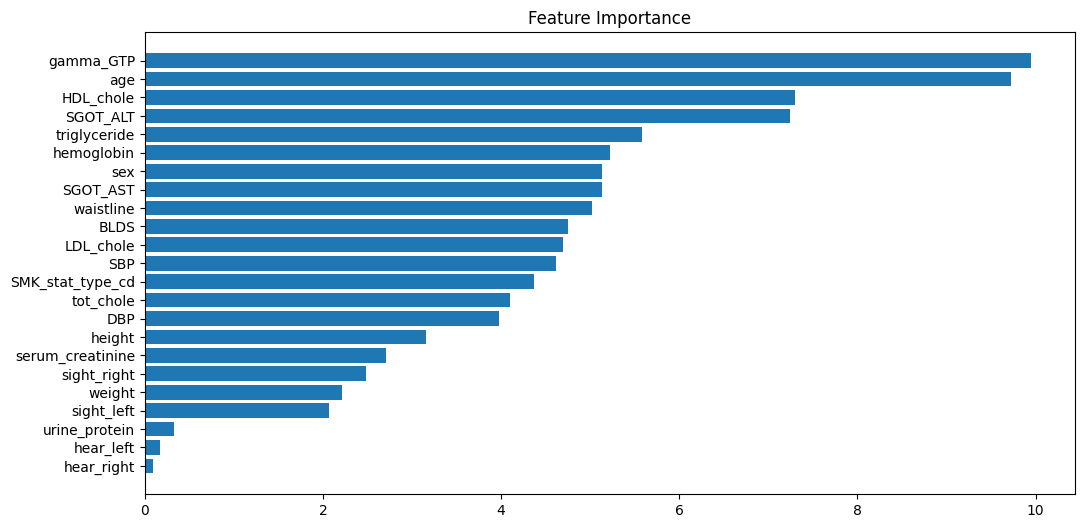

In [40]:
feature_importance = booster.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')